<a href="https://colab.research.google.com/github/musicjae/DeepLearning/blob/main/CNN/CNN(Convolutional_Neural_Net).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving c8.png to c8.png
User uploaded file "c8.png" with length 306323 bytes


In [17]:
from IPython.display import Image

# 1 Overview. 
  
CNN도 일반적인 NN과 유사하다. 이것도 학습가능한 W,b로 구성되어 있다. 그런데 무엇이 다른가? 우리는 이것에 대해 간략히 알아볼 것이다. 

# 2 CNN의 이점  
  
이것은 일반적인 NN과 다르게, Convolution Layer과 Pooling Layer이 추가되어 있다. 이들은 입력층과 출력층 사이에 끼워져 있다. FCnet을 사용하는 경우, 입력값이 클 때 매우 많은 모수의 개수가 요구될 수 있다. 이것은 (1) 학습 속도를 느리게 하고, (2) 계산량이 많아지게 하고, (3) 앞의 현상은 과적합을 일으킬 수 있다. CNN을 이용하면, 모수의 공유를 통해 효과적으로 가중치 개수를 줄일 수 있다.

# 3 아키텍처 개괄  
   

## 3.1 일반적인 아키텍처 구조  
  
- (1) Affine Layer (FCNet)  
- (2) ReLU  
... (반복)

아래 그림은 (1)

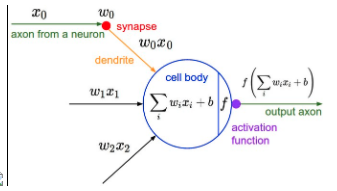

In [ ]:
Image('c1.png')

In [15]:
# affine transform

import numpy as np

x = np.arange(10).reshape(2,5) # input
print('input: \n',x,'\n')
w = np.random.randn(20).reshape(2,10) # weight
b=np.ones(10).reshape(10,1) # bias
print('x size: ',x.shape,'w.T size: ', (w.T).shape,'b size: ',b.shape,'\n')
a = np.dot(w.T,x)+b # affine transform

relu_a = np.maximum(0,a) # activation function

f = relu_a

print('f: \n',f,'\nf size: ',f.shape)

input: 
 [[0 1 2 3 4]
 [5 6 7 8 9]] 

x size:  (2, 5) w.T size:  (10, 2) b size:  (10, 1) 

f: 
 [[ 0.          0.          0.          0.          0.        ]
 [ 1.95686045  1.41808065  0.87930085  0.34052105  0.        ]
 [ 1.38300287  1.30080216  1.21860145  1.13640074  1.05420003]
 [ 0.          0.          0.          0.          0.        ]
 [ 5.471395    6.6519808   7.8325666   9.0131524  10.1937382 ]
 [ 1.96963405  1.19204494  0.41445582  0.          0.        ]
 [ 1.4796037   1.8548089   2.2300141   2.6052193   2.98042449]
 [ 3.7341222   5.13408175  6.53404131  7.93400086  9.33396041]
 [ 4.99802213  6.81106813  8.62411412 10.43716011 12.25020611]
 [ 0.08298524  0.          0.          0.          0.        ]] 
f size:  (10, 5)



## 3.2 CNN의 아키텍처 구조
- (1) 입력층  
 >INPUT 입력 이미지가 가로32, 세로32, 그리고 RGB 채널을 가지는 경우 입력의 크기는 [32x32x3].
- (2) 컨볼루션 층 
 > CONV 레이어는 입력 이미지의 일부 영역과 연결되어 있으며, 이 연결된 영역과 자신의 가중치의 내적 연산 (dot product) 을 계산하게 된다. 결과 볼륨은 [32x32x12]와 같은 크기를 갖게 된다. 
- (3) 렐루  
- (4) 풀링 층  
 > POOL 레이어는 (가로,세로) 차원에 대해 다운샘플링 (downsampling)을 수행해 [16x16x12]와 같이 줄어든 볼륨을 출력한다.   
  > - (=> Downsizing => more efficient computation)
- (5) FCNet  
 > FC (fully-connected) 레이어는 클래스 점수들을 계산해 [1x1x10]의 크기를 갖는 볼륨을 출력한다. 10개 숫자들은 10개 카테고리에 대한 클래스 점수에 해당한다. 레이어의 이름에서 유추 가능하듯, 이 레이어는 이전 볼륨의 모든 요소와 연결되어 있다.

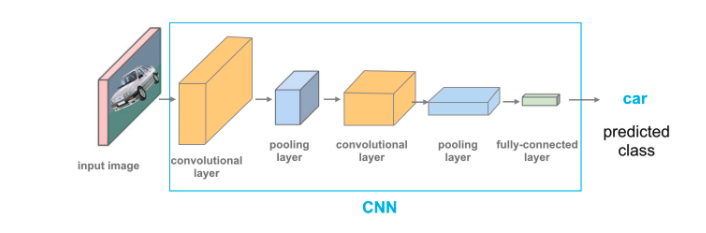

In [ ]:
Image('c3.png')

## 3.3 Conv (Convolution Layer)  
  
- Local Connectivity  
  > FCNet에서는 이전 레이어와 현재 레이어의 모든 유닛이 연결된다. 하지만 이것은 고차원 데이터를 다룰 때 비효율적이다. CNN에서는 모든 유닛들 간의 연결을 만들지 않고, 각 뉴런을 Input volume의 Local region에만 연결할 것이다. 여기서 Input volume에서 연결되는 영역을 **Receptive Field**라고 부른다. 단, input의 depth는 항상 유지해준다. 가령, 32,32,3 크기의 입력을 receptive field를 5,5로 설정할 때, 출력되는 크기는 5,5,3 으로 depth가 유지된 형태이다.  

### 3.3.1 Conv에서 출력되는 것  
  
그렇다면, conv에서 출력되는 volume은 어떤 형태를 갖는가?   
  
이것은 **(1) 깊이, (2) stride, (3) zero-padding**에 의해 결정된다.  
  
- depth: input의 그것과 동일  
- stride: 만약 std=1이라면, 출력 볼륨이 커지는데, 그 이유는 receptive field 위의 넓은 영역이 겹치기 때문이다. 반대로, std가 크면, 좁은 영역이 겹쳐서 출력 볼륨이 작아진다.  


아래 그림은 conv layer에서 수행되는 연산을 요약한 것이다.

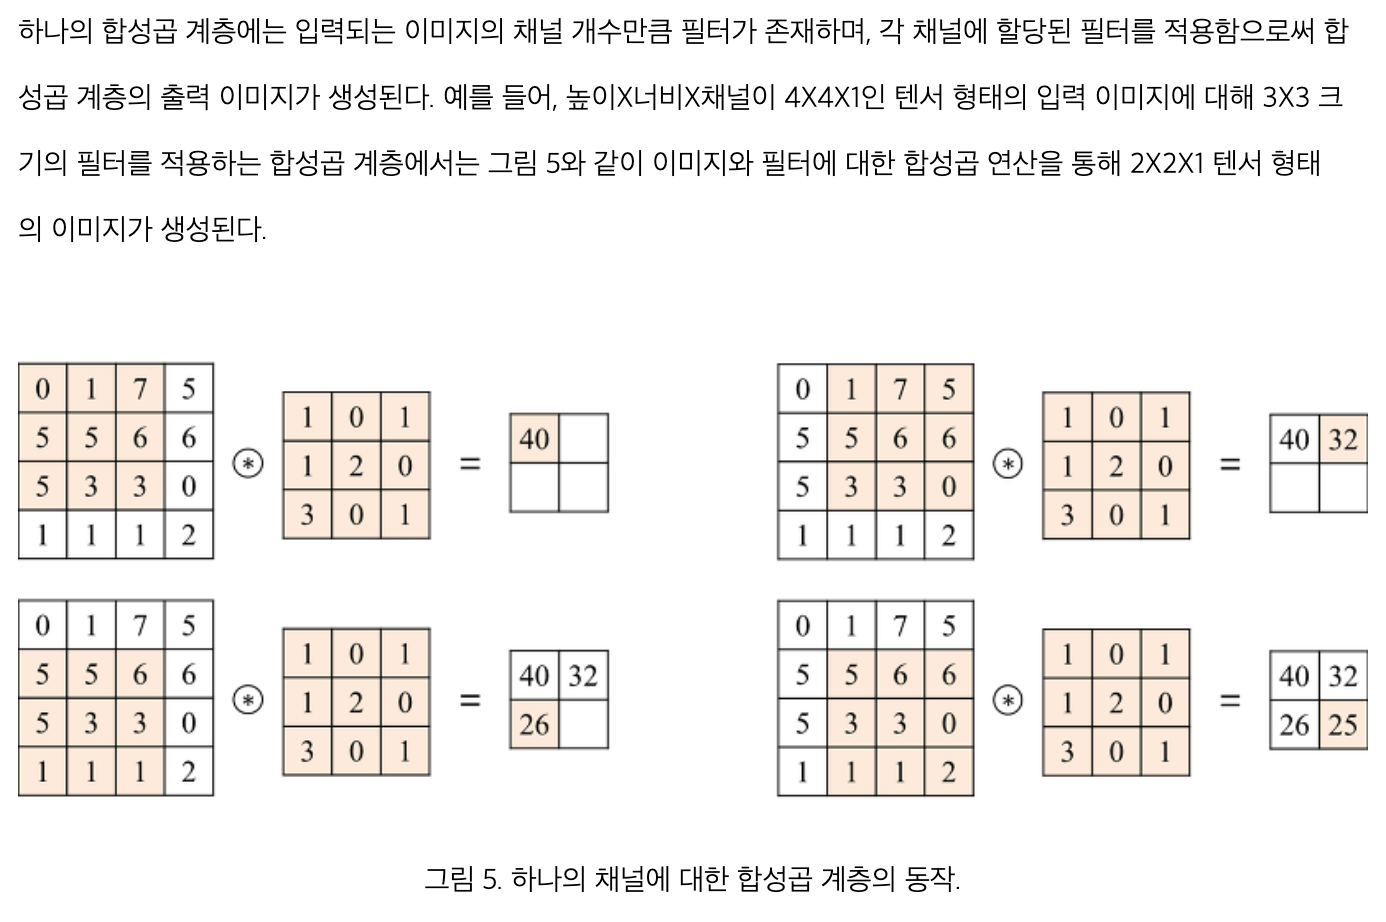

In [21]:
Image('c5.png',width=700,height=500)

- zero-padding: 출력 볼륨의 공간적 크기를 조절하기 위해, 입력 볼륨의 가장자리를 0으로 패딩한다.  
   
 - 출력 volume의 공간적 크기 (Feature map) = $\frac{(W-F+2P)}{S}+1$
  > - W:입력 볼륨 크기,  
    - F: receptive field 크기  
    - S: stride  
    - P: zeropadding의 사이즈
     
단, 만약 P가 정수가 아니면 잘못 구해진 것이다. 
  
따라서,  
 - Output Height = $\frac{(W_{Height}-F_{Height}+2P)}{S}+1$  
 - Output Width = $\frac{(W_{Width}-F_{Width}+2P)}{S}+1$  
   아래는 출력 볼륨의 공간적 크기를 구하는 위 과정의 예를 보여준다.  
     
>       *Notice: Conv layer의 출력값은 Feature map, activation map이라고 불린다.*

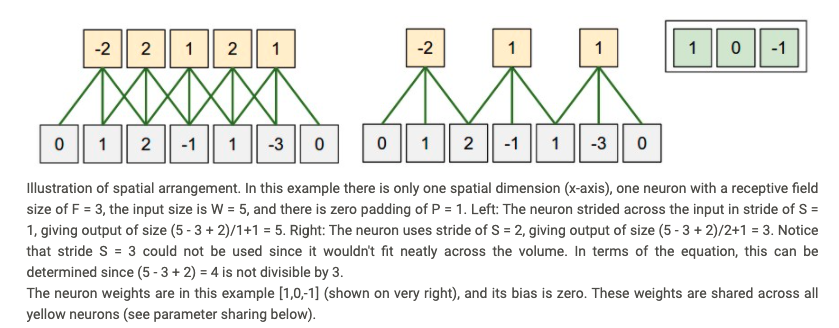

In [ ]:
Image('c2.png')

- 왜 zero-padding이 필요한가?  
  
> 위에서 보았듯이, 합성곱의 수행은 downsampling을 수행하고, 이것은 이미지의 크기를 작게 만든다. 만약 이러한 과정이 반복적으로 수행된다면, 이미지는 점점 작아지면서 그것이 가진 중요한 정보들은 소실될 수 있다. 더욱이, 설정된 stride 값에 대해 conv를 거친 이미지의 크기가 들어맞지 않아 다음 conv 수행이 진행되지 않을 수 있다.  
이러한 문제점들을 해결하기 위해 고안된 것이 zero-padding 이다. 아래는 첫번째 문제점과 그것의 해소에 대한 사례를 보여준다.

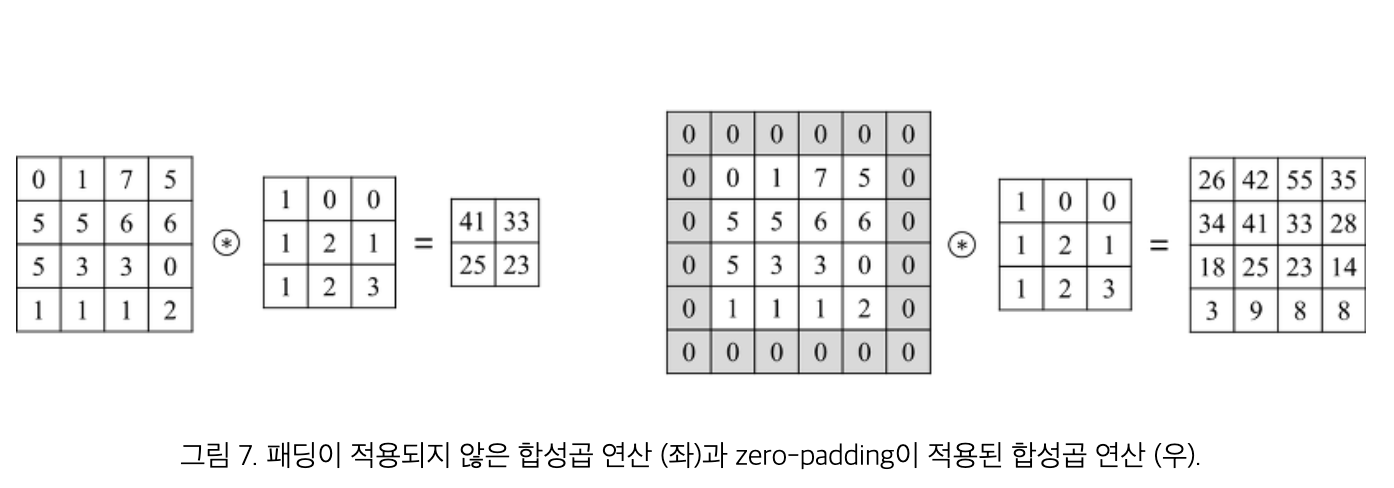

In [25]:
Image('c6.png',width=700,height=300)

## 3.4 Pooling Layer

앞의 과정에서 소개한 컨볼루션 계층을 지난 값은 풀링 계층에 입력된다. 풀링에는 여러가지 방법들이 있지만 **Max-Pooling**이 인기가 있다. 이것에 대해 간략히 알아보자. 아래 그림은 stride=2인 풀링의 수행을 보여준다.

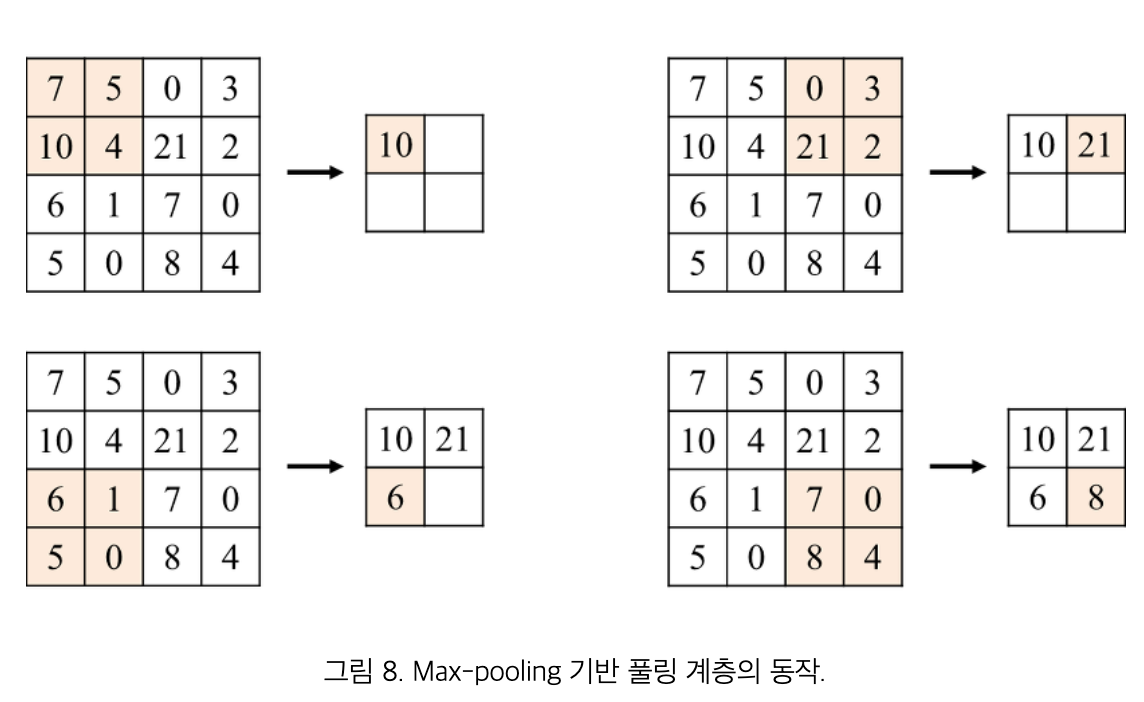

In [27]:
Image('c7.png',width=600,height=400)

좌상단의 그림을 보자. 필터중인 4 개의 수 중에 **가장 큰max 값**을 output 중 하나로 샘플링한다. 다음 우측 그림에서도 마찬가지로 풀링 중인 4 개의 수 중 가장 큰 값을 샘플링한다.

### 3.4.1 Pooling 수행이 주는 이점  
  
- 이미지를 구성하는 요소들의 이동, 회전 등에 의한 변형이 주는 CNN 출력값의 변화에 대한 문제를 다소 경감시킬 수 있다. 
  
- 이미지의 크기가 줄어들기 때문에 parameters의 수도 줄어든다. 그러한 탓에 학습 시간이 줄어들고, 과적합Overfitting 문제도 다소 해소할 수 있다.

## 3.5 Summary  

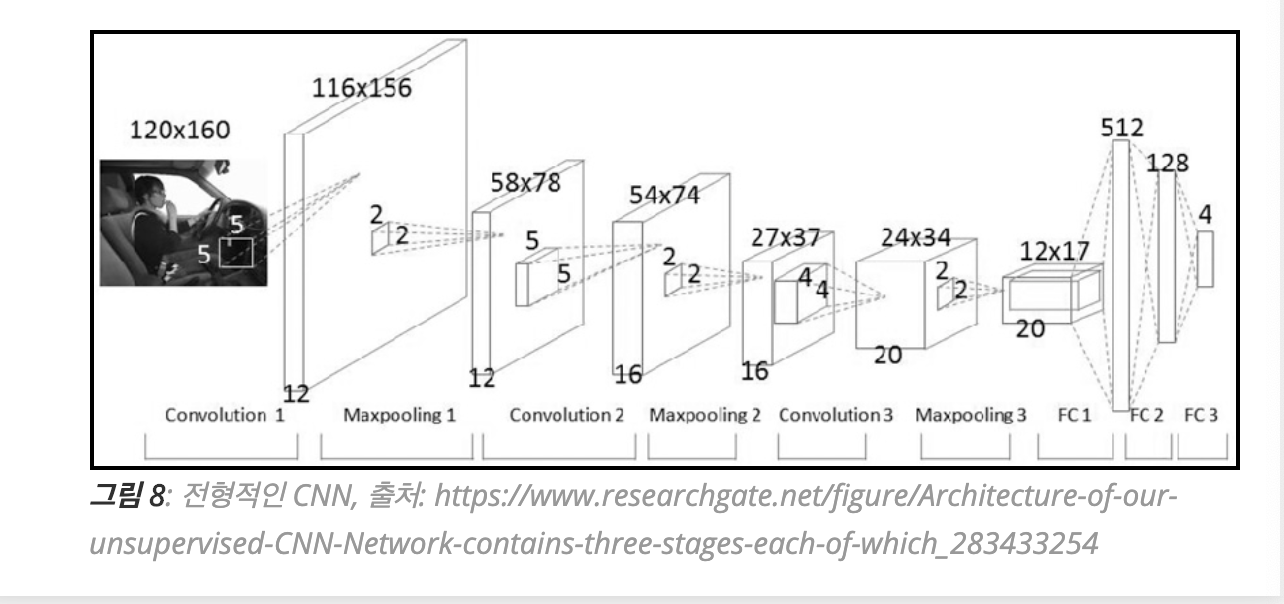

In [31]:
Image('c8.png',width=800,height=400)

# 4 Implementation

위 3.5에서의 summary 그림을 코딩해보자.

In [33]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential() # Sequential 오브젝트 사용
"""
12개의 필터 사용
2차원 convolution filter 사용
kernel(filter) size = (5,5)
"""
model.add(Conv2D(12,kernel_size=(5,5),activation='relu',input_shape=(120,160,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # 512
model.add(Dense(128,activation='relu')) #FCNet, 128 노드
model.add(Dense(128,activation='softmax'))


케라스 입문 https://ebbnflow.tistory.com/120 참조  
Conv2D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 156, 12)      312       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 78, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 74, 16)        4816      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 34, 16)        4112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 17, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3264)              0

# References  
[1] http://aikorea.org/cs231n/convolutional-networks/  
[2] https://cs231n.github.io/convolutional-networks/#conv  
[3] https://cezannec.github.io/Convolutional_Neural_Networks/  
[4] https://untitledtblog.tistory.com/150  
[5] http://taewan.kim/post/cnn/  
[6] https://ebbnflow.tistory.com/120